로지스틱 회귀


 - 로지스틱 회귀는 **'예' 또는 '아니오'**처럼 둘 중 하나를 결정하는 문제에 사용되는 통계 모델입니다. 

 - 단순히 분류만 하는 것이 아니라, 그 가능성을 확률로 표현하는 것이 특징입니다.


어떻게 작동하나요?

 - 로지스틱 회귀는 시그모이드 함수를 사용합니다. 

 - 이 함수는 어떤 입력값이든 0과 1 사이의 확률로 변환합니다.

    - 예를 들어, 스팸 필터 모델이 '이메일이 스팸일 확률이 0.85입니다'라고 계산하면, 우리는 이를 '스팸일 가능성 85%'로 해석합니다.

    - 이 확률이 0.5라는 기준값(임계값)을 넘으면 **'스팸'**으로, 넘지 않으면 **'정상'**으로 최종 분류합니다.

테스트 데이터의 정확도: 1.0000



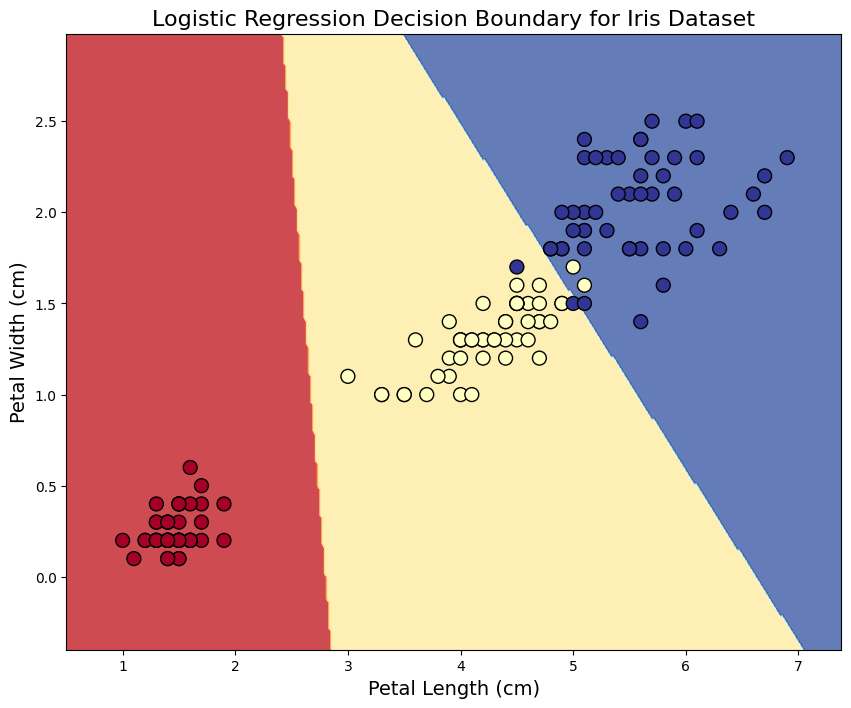

--- 모델의 계수와 절편 ---
모델의 계수(Coefficients):
[[-2.59524071 -1.09048831]
 [ 0.0739952  -0.74732063]
 [ 2.52124551  1.83780894]]
모델의 절편(Intercept):
[ 10.39369743   2.91401203 -13.30770947]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기 (Iris 데이터셋)
# 시각화를 위해 4개의 특성 중 2개만 사용합니다.
iris_data = load_iris()

# 꽃잎의 길이(petal length)와 꽃잎의 너비(petal width) 특성만 선택
X = iris_data.data[:, 2:]
y = iris_data.target

# 2. 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)

# 5. 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터의 정확도: {accuracy:.4f}\n")


# 6. 시각화 (결정 경계 그리기)
# 결정 경계를 그리기 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 그리드 포인트에서 모델의 예측값(확률)을 계산
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 예측 결과를 바탕으로 등고선 플롯 생성
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# 실제 데이터 포인트를 산점도로 표시
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu, s=100)

# 축 레이블과 제목 설정
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.title('Logistic Regression Decision Boundary for Iris Dataset', fontsize=16)
plt.show()

# 추가 정보 출력
print("--- 모델의 계수와 절편 ---")
print(f"모델의 계수(Coefficients):\n{model.coef_}")
print(f"모델의 절편(Intercept):\n{model.intercept_}")



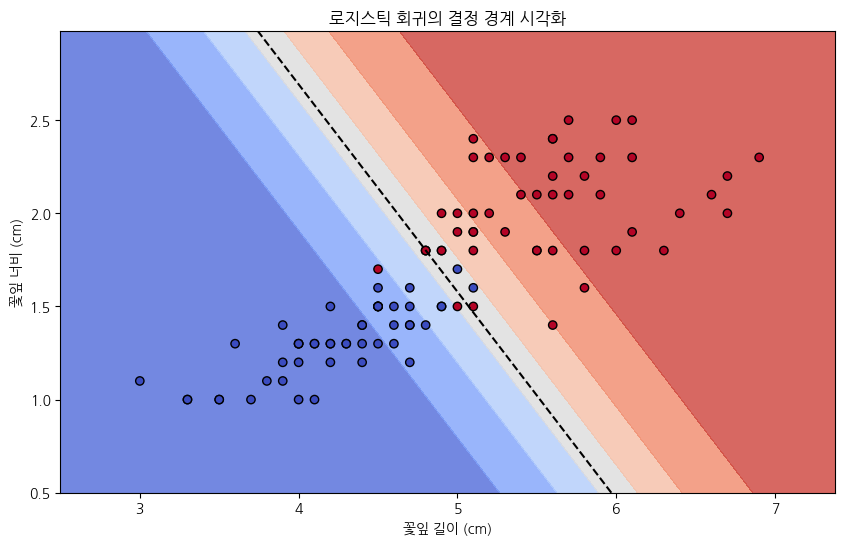

테스트 데이터셋에서의 모델 정확도: 0.93


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.

# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# pip install scikit-learn matplotlib numpy

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 만약 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("Warning: NanumGothic font not found. Please install a Korean font to display Hangul correctly.")

# -----------------------------------------------------------
# 3. 데이터 준비
# -----------------------------------------------------------
# 붓꽃(Iris) 데이터셋을 로드합니다.
iris = datasets.load_iris()

# 로지스틱 회귀의 기본 개념에 맞춰, 두 개의 클래스만 사용하도록 데이터를 필터링합니다.
# 'versicolor'와 'virginica' 클래스를 선택하고, 이들의 꽃잎(petal) 길이와 너비 특성을 사용합니다.
X = iris.data[iris.target != 0, 2:] # 클래스 0(setosa)를 제외한 데이터의 꽃잎 길이와 너비 특성
y = iris.target[iris.target != 0] # 클래스 0(setosa)를 제외한 타겟(클래스) 데이터

# 타겟 레이블을 0과 1로 재조정하여 이진 분류 문제로 만듭니다.
# 기존 1(versicolor) -> 0, 기존 2(virginica) -> 1
y[y == 1] = 0
y[y == 2] = 1

# 데이터를 훈련용과 테스트용으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------------------------------------
# 4. 로지스틱 회귀 모델 학습
# -----------------------------------------------------------
# 로지스틱 회귀 모델 객체를 생성합니다.
log_reg = LogisticRegression(random_state=42)

# 훈련 데이터를 사용하여 모델을 학습시킵니다.
log_reg.fit(X_train, y_train)

# -----------------------------------------------------------
# 5. 결정 경계 시각화
# -----------------------------------------------------------
# 학습된 모델의 결정 경계를 시각화하여 로지스틱 회귀가 어떻게 데이터를 분류하는지 보여줍니다.
plt.figure(figsize=(10, 6))

# 시각화를 위한 그리드 데이터 생성
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 그리드 포인트에서 모델의 예측 확률을 계산하고, 이를 등고선으로 시각화합니다.
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# 실제 데이터 포인트를 산점도로 표시합니다.
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# 결정 경계(확률이 0.5가 되는 지점)를 점선으로 그립니다.
decision_boundary = plt.contour(xx, yy, Z, levels=[0.5], linestyles='--', colors='black')

# 그래프 제목과 축 레이블 설정
plt.title('로지스틱 회귀의 결정 경계 시각화')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.show()

# -----------------------------------------------------------
# 6. 모델 평가
# -----------------------------------------------------------
# 훈련된 모델의 정확도를 평가합니다.
score = log_reg.score(X_test, y_test)
print(f"테스트 데이터셋에서의 모델 정확도: {score:.2f}")

